# **Using PCA with Images**

We can apply PCA to different types of data. In this example, we are going to process some images. To do so we are going to use the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. This is a dataset of hadwritten numbers commonly used as a toy dataset for image processing. It has a training set of 60,000 examples, and a test set of 10,000 examples and each example has 784 features.

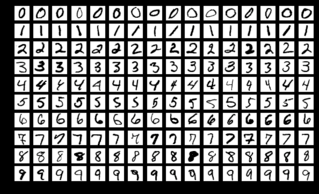

## **Importing the libraries and downloading the dataset**

Downloading the dataset is going to take a couple of minutes,  be sure to execute this part of the code early so you have it ready for when you do the exercises.

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

mnist = fetch_openml('mnist_784')

The images:

In [3]:
mnist.data.shape

(70000, 784)

The labels:

In [4]:
mnist.target.shape

(70000,)

## **Creation of the sets and standarization of the data**

We are goin to create firs the train and test sets:

In [5]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size=1/7.0, random_state=0)
# Training images
print(train_img.shape)


(60000, 784)


In [6]:
# Training labels
print(train_lbl.shape)



(60000,)


In [7]:
# test images
print(test_img.shape)

(10000, 784)


In [8]:
# test labels
print(test_lbl.shape)

(10000,)


And now we standarize it:

In [9]:
scaler = StandardScaler()
scaler.fit(train_img) # WARNING: we only fit the scaler on the training set... why?
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## **Applying the PCA**


In [10]:
# If the number of components is between 0 and 1, select the number of components
# such that the amount of variance that needs to be explained is greater than the
# percentage specified by n_components.

pca = PCA(.95)
pca.fit(train_img)
pca.n_components_

327

You can see that if we state that we want a variance of at least the 95%, we need 327 components to do so. Take note that this is another way to do it, in the previous example, we were stating the exact number of components that we wanted, here, the minimun variance. Both approaches are useful, depending on the problem that you are trying to solve (that is why it is important to read the documentation of the methods that you are using!).

We apply the PCA to the sets...

In [11]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)



...and we are ready to train some models!

## **Classifiying the images with logistic regresion**

We are going to use a logistic regresion as our model. Usually when working with images I would use a Convolutional Neural Network (CNN), but that is something for the second semester ;-).

First we train the model with the training set (this dataset is bigger, so is going to take some time, from 30 to 60 seconds depending on the colab instance):

In [12]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_img, train_lbl)

C:\Users\aitor\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Don't worry about the number of iterations warning. The results are good enough for us without the model converging.

Let's see how well our model performs:

In [13]:
score = logisticRegr.score(test_img, test_lbl)
print(score)



0.9201


A 92% accuracy while trying to recognize the handwritten numbers, not bad for a logistic regresion (for comparison, with CNNs is possible to achieve a 99% or 100% accuracy).

Now that we have the model trained, we can use it to solve the task in the future. For example, to recognize one image:

In [14]:
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

Or a set of images:

In [15]:
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

# **Exercises**



1.   Try repeating the process with different values for the variance. How does it affect the results? Is there any point where the results degrade drastically? How does the reduction of features affect the training time of the model? A good way to see this is to copy the values and make two graphics, one for the accuracy and other for the training time (i.e., using Google Sheets). You will need 15-20 variance values to have something interesting.
2.   What happens without the standarization? Does the model perform better or worse?


